In [16]:
import requests
import urllib.parse
import json
import pandas as pd
import matplotlib.pyplot as plt


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Nhập vào thành phố, nước : (Ex: HaNoi, VN):  HaNoi, VietNam 
=================== DỰ BÁO THỜI TIẾT ===================

Today:Wed, 17 Oct 2018 04:58 PM ICT || (Hà Nội Vietnam ) || Showers Nhiệt độ thấp nhất20°C, Nhiệt độ cao nhất 23°C

             Day  High  Low                     Text
17 Oct 2018  Wed    23   20  Scattered Thunderstorms
18 Oct 2018  Thu    25   21                   Cloudy
19 Oct 2018  Fri    28   22                   Cloudy
20 Oct 2018  Sat    30   23  Scattered Thunderstorms
21 Oct 2018  Sun    31   25            Thunderstorms
22 Oct 2018  Mon    31   25            Thunderstorms
23 Oct 2018  Tue    28   24            Thunderstorms
24 Oct 2018  Wed    29   22        Scattered Showers
25 Oct 2018  Thu    29   23  Scattered Thunderstorms
26 Oct 2018  Fri    30   23            Thunderstorms


<Figure size 432x288 with 0 Axes>

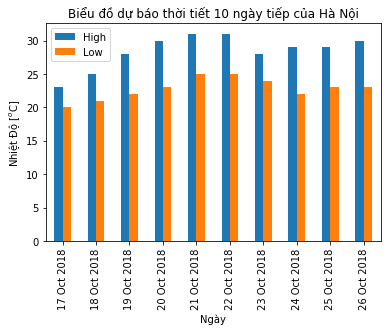

In [55]:
location = str(input("Nhập vào thành phố, nước : (Ex: HaNoi, VN):  "))
baseurl = "https://query.yahooapis.com/v1/public/yql?"
yql_query = "select * from weather.forecast where woeid in \
    (select woeid from geo.places(1) where text=\"{}\") and u=\"{}\"".format(location,'c')
yql_url = baseurl + urllib.parse.urlencode({'q': yql_query}) + "&format=json"
result = requests.get(yql_url)
data = json.loads(result.text)

data_forecast = data["query"]["results"]["channel"]["item"]["forecast"]
city = data['query']['results']['channel']['location']['city']
country = data['query']['results']['channel']['location']['country']
text = data['query']['results']['channel']['item']['condition']['text']
low = data['query']['results']['channel']['item']['forecast'][0]['low']
high = data['query']['results']['channel']['item']['forecast'][0]['high']
time_now = data['query']['results']['channel']['lastBuildDate']

dates, days, highs, lows, texts = [], [], [], [], [] 
for i in range(len(data_forecast)):
    dates.append(data["query"]["results"]["channel"]["item"]["forecast"][i]["date"])
    days.append(data["query"]["results"]["channel"]["item"]["forecast"][i]["day"])
    highs.append(data["query"]["results"]["channel"]["item"]["forecast"][i]["high"])
    lows.append(data["query"]["results"]["channel"]["item"]["forecast"][i]["low"])
    texts.append(data["query"]["results"]["channel"]["item"]["forecast"][i]["text"])
    
d = {'Day': days, 'High': highs, 'Low': lows, 'Text': texts}
df = pd.DataFrame(columns= ['Day', 'High', 'Low', 'Text'], data=d, index=dates)

plt.figure(1)
df.High = df.High.astype(int)
df.Low = df.Low.astype(int)
df.plot.bar()
plt.xlabel('Ngày')
plt.ylabel('Nhiệt Độ [$^o$C]')
plt.title('Biểu đồ dự báo thời tiết 10 ngày tiếp của ' + city)

print("=================== DỰ BÁO THỜI TIẾT ===================")
print('\nToday:' + time_now + " || (" + city + " " + country + " ) || " + \
      text + " Nhiệt độ thấp nhất" + low + "°C, Nhiệt độ cao nhất " + high + '°C\n')
print(df)
plt.show()

,Date,Day,High,Low,Text
0,17 Oct 2018,Wed,23,20,Scattered Thunderstorms
1,18 Oct 2018,Thu,25,21,Cloudy
2,19 Oct 2018,Fri,28,22,Cloudy
3,20 Oct 2018,Sat,30,23,Scattered Thunderstorms
4,21 Oct 2018,Sun,31,25,Thunderstorms
5,22 Oct 2018,Mon,31,25,Thunderstorms
6,23 Oct 2018,Tue,28,24,Thunderstorms
7,24 Oct 2018,Wed,29,22,Scattered Showers
8,25 Oct 2018,Thu,29,23,Scattered Thunderstorms
9,26 Oct 2018,Fri,30,23,Thunderstorms
